### 분석사례 3
"어떤 코너와 메뉴를 어떤 날씨에 더 선호할까?"

In [2]:
import pandas as pd

In [4]:
식당 = pd.read_excel('share/data/food_order.xlsx')
식당[:3]

,date,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
0,2013-08-06,dinner,grill & fry,훈제연어벤또(200개),F,213,0,0,0,0,0,-213,2013,8,6,1
1,2013-08-06,dinner,rice & soup 1,뚝배기 우거지 갈비탕,F,261,0,0,0,0,0,-261,2013,8,6,1
2,2013-08-06,lunch,noodle bar,판모밀정식,F,267,0,0,0,0,0,-267,2013,8,6,1


In [6]:
식당 = pd.read_excel('식당.xlsx')
식당[:3]

,date,메뉴,코너,시간대,주문수량
0,2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213
1,2013-08-06,뚝배기 우거지 갈비탕,rice & soup 1,dinner,261
2,2013-08-06,판모밀정식,noodle bar,lunch,267


In [8]:
날씨 = pd.read_excel('share/data/weather.xlsx')
날씨[:3]

,location,date,weekDay,avgTemp,highestTemp,lowestTemp,precipitation,snow,windSpeed,humidity,cloud,dayTime,weather
0,seoul,2013-08-01,thur,28.0,32.1,24.5,-,-,1.8,66,7.1,6.0,구름많음
1,seoul,2013-08-02,fri,27.4,29.3,25.2,7.5,-,2.1,79,9.1,0.9,흐림/안개/비
2,seoul,2013-08-03,sat,28.9,32.6,26.7,0.1,-,3.6,72,8.1,8.9,흐림/소나기


### 연습
날씨 자료에서 다음을 수행하고, 결과를 '날씨.xlsx' 파일로 저장

1. 'date', 'location', 'avgTemp', 'weather' 열 선택
2. 열 제목을 적절한 한국어 명칭으로 교체


In [19]:
정리컬럼 = ['date', 'location', 'avgTemp', 'weather']
날씨정리 = 날씨[정리컬럼]
날씨정리[:3]

정리날씨 = 날씨정리.rename(columns={'date': '날짜', 'location':'지역', 'avgTemp':'일평균온도', 'weather':'기상속성'})
정리날씨.to_excel('날씨.xlsx')

날씨 = 정리날씨

In [23]:
날씨 = pd.read_excel('날씨.xlsx')
날씨[:3]

,날짜,지역,일평균온도,기상속성
0,2013-08-01,seoul,28.0,구름많음
1,2013-08-02,seoul,27.4,흐림/안개/비
2,2013-08-03,seoul,28.9,흐림/소나기


"날씨에 다라 코너의 인기도가 달라질까?"

In [26]:
수원날씨 = 날씨[날씨.지역 == 'suwon']
수원날씨[:3]

,날짜,지역,일평균온도,기상속성
153,2013-08-01,suwon,27.8,구름많음/안개
154,2013-08-02,suwon,28.2,흐림/안개/비
155,2013-08-03,suwon,28.6,구름많음/소나기


식당과 날씨 자료를 합치자

In [29]:
식당날씨 = pd.merge(식당, 날씨, left_on='date', right_on='날짜')

In [31]:
식당날씨[:3]

,date,메뉴,코너,시간대,주문수량,날짜,지역,일평균온도,기상속성
0,2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213,2013-08-06,seoul,26.4,구름많음/안개/천둥번개/비
1,2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213,2013-08-06,suwon,25.9,구름많음/소나기/안개/천둥번개
2,2013-08-06,뚝배기 우거지 갈비탕,rice & soup 1,dinner,261,2013-08-06,seoul,26.4,구름많음/안개/천둥번개/비


날씨에 따른 코너별 주문수량 집게

In [34]:
식당날씨.pivot_table('주문수량', index='기상속성', columns='코너')


코너,after school,burger&pizza,grill & fry,noodle bar,rice & soup 1,rice & soup 2,take out
기상속성,,,,,,,
구름많음,139.577778,147.052632,230.036496,173.428571,215.672897,245.224490,190.376238
구름많음/눈,135.642857,128.416667,208.384615,180.076923,223.904762,222.333333,164.904762
구름많음/비,139.155172,133.637931,239.655172,189.603448,224.988506,274.200000,209.022989
구름많음/비/소나기,142.500000,127.500000,179.000000,188.000000,176.666667,276.000000,163.666667
구름많음/비/안개,109.500000,116.142857,215.428571,176.285714,178.380952,244.857143,142.523810
구름많음/비/안개/이슬비,98.500000,54.000000,155.500000,125.500000,169.000000,266.000000,128.666667
구름많음/비/안개/황사,104.500000,136.000000,339.000000,196.500000,231.666667,177.000000,161.000000
구름많음/비/천둥번개,76.000000,47.000000,123.000000,54.000000,89.000000,NaN,65.000000
구름많음/소나기,126.333333,129.166667,205.833333,171.666667,177.111111,185.666667,146.222222


In [36]:
식당날씨.pivot_table('주문수량', index='코너', columns='기상속성')

기상속성,구름많음,구름많음/눈,구름많음/비,구름많음/비/소나기,구름많음/비/안개,구름많음/비/안개/이슬비,구름많음/비/안개/황사,구름많음/비/천둥번개,구름많음/소나기,구름많음/소나기/안개,...,흐림/소나기,흐림/소나기/안개,흐림/소나기/천둥번개,흐림/소낙눈/안개,흐림/안개,흐림/안개/눈,흐림/안개/비,흐림/안개/이슬비,흐림/안개/천둥번개/비,흐림/천둥번개/비
코너,,,,,,,,,,,,,,,,,,,,,
after school,139.577778,135.642857,139.155172,142.500000,109.500000,98.500000,104.500000,76,126.333333,143.750000,...,190.500000,161.333333,190.500000,136.000000,152.488889,150.250000,146.875000,155.333333,163.5,138.500000
burger&pizza,147.052632,128.416667,133.637931,127.500000,116.142857,54.000000,136.000000,47,129.166667,121.000000,...,148.500000,146.000000,148.500000,154.000000,143.488889,141.750000,159.382353,169.333333,224.0,151.000000
grill & fry,230.036496,208.384615,239.655172,179.000000,215.428571,155.500000,339.000000,123,205.833333,251.375000,...,198.000000,232.500000,198.000000,271.000000,222.500000,199.000000,246.450704,288.400000,303.5,365.500000
noodle bar,173.428571,180.076923,189.603448,188.000000,176.285714,125.500000,196.500000,54,171.666667,170.250000,...,211.500000,196.333333,211.500000,203.000000,185.400000,180.250000,188.927536,217.333333,215.5,203.000000
rice & soup 1,215.672897,223.904762,224.988506,176.666667,178.380952,169.000000,231.666667,89,177.111111,198.416667,...,184.000000,221.222222,184.000000,152.333333,222.739130,304.416667,233.611111,284.750000,360.0,339.333333
rice & soup 2,245.224490,222.333333,274.200000,276.000000,244.857143,266.000000,177.000000,NaN,185.666667,217.000000,...,255.000000,215.333333,255.000000,NaN,262.187500,268.000000,235.884615,211.000000,NaN,NaN
take out,190.376238,164.904762,209.022989,163.666667,142.523810,128.666667,161.000000,65,146.222222,173.333333,...,238.333333,215.888889,238.333333,101.000000,197.376812,213.583333,195.860000,200.666667,201.0,245.333333


In [64]:
눈비여부 = 식당날씨.기상속성.str.contains('비|눈|소나기')
눈비여부[:3]

0    True
1    True
2    True
Name: 기상속성, dtype: bool

In [65]:
눈비여부 = 눈비여부.replace({True:'rain snow', False:'not rain snow'})

In [66]:
눈비여부.value_counts()

not rain snow    9472
rain snow        4178
Name: 기상속성, dtype: int64

In [67]:
코너별눈비별_주문평균 = 식당날씨.pivot_table('주문수량', index='코너', columns=눈비여부)

In [59]:
%matplotlib inline

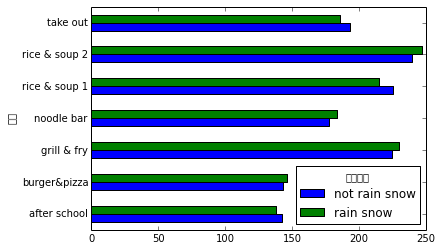

In [69]:
코너별눈비별_주문평균.plot(kind='barh')

"기상에 따라 코너에 대한 선호도가 유의미하게 바뀔까?"

===> 일단 각 코너의 주문량을 백분율로 만들어서 봐야겠다

In [70]:
코너별눈비별_주문평균


기상속성,not rain snow,rain snow
코너,,
after school,142.332558,137.716549
burger&pizza,143.421260,146.260791
grill & fry,224.537685,229.332149
noodle bar,177.272019,183.740675
rice & soup 1,225.172553,214.621810
rice & soup 2,239.442177,246.753363
take out,193.032308,185.683274


In [73]:
코너별합계 = 코너별눈비별_주문평균.sum(axis=1)
코너별합계

코너
after school     280.049107
burger&pizza     289.682051
grill & fry      453.869834
noodle bar       361.012694
rice & soup 1    439.794363
rice & soup 2    486.195540
take out         378.715583
dtype: float64

In [76]:
코너별눈비별_주문비율 = 코너별눈비별_주문평균.div(코너별합계, axis=0)

In [78]:
코너별눈비별_주문비율

기상속성,not rain snow,rain snow
코너,,
after school,0.508241,0.491759
burger&pizza,0.495099,0.504901
grill & fry,0.494718,0.505282
noodle bar,0.491041,0.508959
rice & soup 1,0.511995,0.488005
rice & soup 2,0.492481,0.507519
take out,0.509703,0.490297


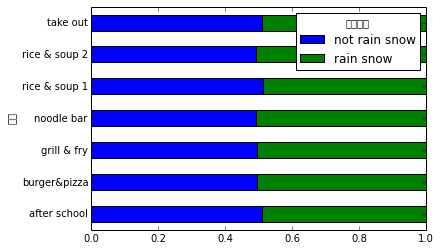

In [81]:
코너별눈비별_주문비율.plot(kind='barh', stacked=True)

기상에 따른 코너별 상대적 선호도를 (꼭) ㅇㄹ아야겠다면
눈비 오는 날 상대적으로 더 선호하는 코너?


In [85]:
비율평균 = 코너별눈비별_주문비율['rain snow'].mean()

In [87]:
비율차 = 코너별눈비별_주문비율['rain snow'] - 비율평균

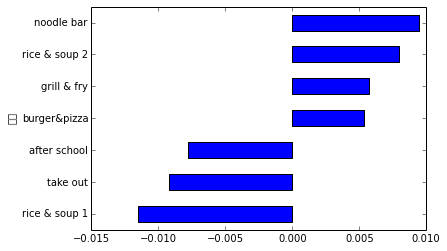

In [90]:
비율차.sort_values().plot(kind='barh')

In [92]:
식당날씨[:3]

,date,메뉴,코너,시간대,주문수량,날짜,지역,일평균온도,기상속성
0,2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213,2013-08-06,seoul,26.4,구름많음/안개/천둥번개/비
1,2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213,2013-08-06,suwon,25.9,구름많음/소나기/안개/천둥번개
2,2013-08-06,뚝배기 우거지 갈비탕,rice & soup 1,dinner,261,2013-08-06,seoul,26.4,구름많음/안개/천둥번개/비


### 연습

날씨에 따라 야근 비율이 달라질까?
--> 전체 코너의 저녁시간 주문량 평균을 날씨에 따라 구하고 비율을 비교

In [120]:
식당날씨2 = pd.merge(식당, 날씨, left_on='date', right_on='날짜')
식당날씨2[:3]

In [155]:
#식당날씨2 = 식당날씨.pivot_table('주문수량', index='시간대', columns=눈비여부)
#식당날씨2.plot(kind='barh')
#저녁여부 = 식당날씨.시간대.str.contains('dinner')
#시간대별 = 식당날씨2.set_index('시간대').groupby(눈비여부)


In [159]:
시간대별눈비별_주문평균 = 식당날씨.pivot_table('주문수량', index='시간대', columns=눈비여부)
시간대별눈비별_주문평균.div(시간대별눈비별_주문평균.sum(1), axis=0)

기상속성,not rain snow,rain snow
시간대,,
breakfast,0.509025,0.490975
dinner,0.505272,0.494728
lunch,0.501814,0.498186


요일에 따른 식당 이용율

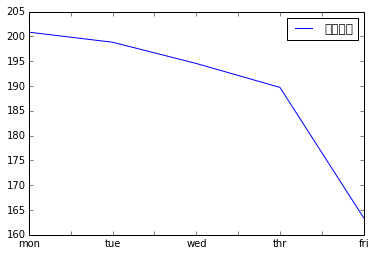

In [139]:
요일별 = 식당날씨.set_index('date').groupby(lambda 날짜: 날짜.weekday())

요일별[['주문수량']].mean().rename({0:'mon', 1:'tue', 2:'wed', 3:'thr', 4:'fri', 5:'sat', 6:'sun'}).plot()